## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sem
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df=pd.merge(mouse_metadata,study_results,how='outer',on=['Mouse ID'])
# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_count_df=len(merged_df['Mouse ID'].unique())
mice_count_df

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_df=merged_df.loc[merged_df.duplicated(['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicate_mice_df

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_df=merged_df.loc[merged_df['Mouse ID']=='g989',:]
g989_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# issues with drop_duplicates, drop, del, isin allowed to call 'g989', need to verify dropped all 
# records since value in cleaned_count_df is only 1 different not 2 for both being deleted. 
# revisit drop and del methods with calling duplicate_mice_df 

cleaned_df=merged_df[merged_df['Mouse ID'].isin(duplicate_mice_df)==False]

cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_count_df=len(cleaned_df['Mouse ID'].unique())
cleaned_count_df

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# tumor_vol doesn't work when doing groupby cause only calls the one column so there is no 'Drug Regimen'
# reapproach
# tumor_vol=cleaned_df['Tumor Volume (mm3)']

# tumor_mean=np.mean(tumor_vol) 
# tumor_median=np.median(tumor_vol)
# tumor_variance=np.var(tumor_vol)
# tumor_stdev=np.std(tumor_vol)
# tumor_sem=tumor_vol.sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumor_groups=cleaned_df.groupby(['Drug Regimen'],as_index=False)

tumor_mean=tumor_groups['Tumor Volume (mm3)'].mean()
tumor_median=tumor_groups['Tumor Volume (mm3)'].median()
tumor_var=tumor_groups['Tumor Volume (mm3)'].var()
tumor_stdev=tumor_groups['Tumor Volume (mm3)'].std()
tumor_sem=tumor_groups['Tumor Volume (mm3)'].sem()

#create the dataframe ## why is it printing singles not collective????
sum_stats=pd.DataFrame={
                "Tumor Vol Mean":tumor_mean,
                "Tumor Vol Median":tumor_median,
                "Tumor Vol Mode":tumor_var,
                "Tumor Vol Variance":tumor_stdev,
                "Tumor Vol SEM":tumor_sem
                }

# print the data frame
sum_stats


{'Tumor Vol Mean':   Drug Regimen  Tumor Volume (mm3)
 0    Capomulin           40.675741
 1     Ceftamin           52.591172
 2    Infubinol           52.884795
 3     Ketapril           55.235638
 4     Naftisol           54.331565
 5      Placebo           54.033581
 6     Propriva           52.320930
 7     Ramicane           40.216745
 8     Stelasyn           54.233149
 9    Zoniferol           53.236507,
 'Tumor Vol Median':   Drug Regimen  Tumor Volume (mm3)
 0    Capomulin           41.557809
 1     Ceftamin           51.776157
 2    Infubinol           51.820584
 3     Ketapril           53.698743
 4     Naftisol           52.509285
 5      Placebo           52.288934
 6     Propriva           50.446266
 7     Ramicane           40.673236
 8     Stelasyn           52.431737
 9    Zoniferol           51.818479,
 'Tumor Vol Mode':   Drug Regimen  Tumor Volume (mm3)
 0    Capomulin           24.947764
 1     Ceftamin           39.290177
 2    Infubinol           43.128684
 3    

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_sum_stats=cleaned_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
agg_sum_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Candidate Count')

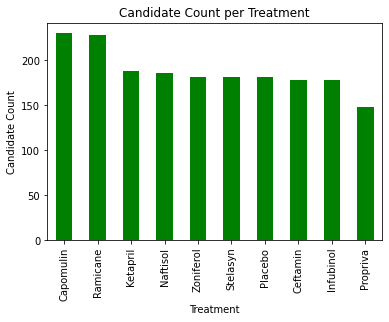

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measurements_count=cleaned_df['Drug Regimen'].value_counts()
measurements_chart=measurements_count.plot(kind="bar",title="Candidate Count per Treatment",color='green')
measurements_chart.set_xlabel("Treatment")
measurements_chart.set_ylabel("Candidate Count")


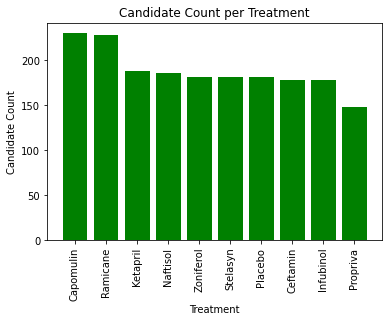

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
measurements_df=cleaned_df['Drug Regimen']

#set axes
x_axis=measurements_count.index.values
y_axis=measurements_count.values

#set plt to bar, and add some formatting
plt.bar(x_axis,y_axis,color='green')

#add labels and rotate drug names so do not overlap
plt.title("Candidate Count per Treatment")
plt.xlabel("Treatment")
plt.ylabel("Candidate Count")
plt.xticks(rotation="vertical")

#show chart
plt.show()

<AxesSubplot:title={'center':'Gender Statistics'}, ylabel='Sex'>

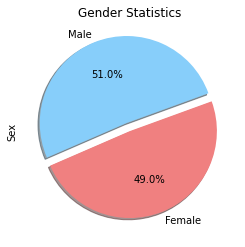

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#dataframe values
gender_pie=cleaned_df['Sex'].value_counts()

gender_pie_df=({
    "Gender Statistics":gender_pie
})

#plot the pie
pie_plot=gender_pie.plot.pie(ylabel='Sex',title='Gender Statistics',explode=[0.1,0],colors=['lightskyblue','lightcoral'],shadow=True,
                            autopct="%1.1f%%",startangle=20)

#show
pie_plot

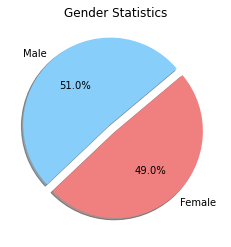

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#labels for pie chart
gender_labels=['Male','Female']

#values
gender_pie=cleaned_df['Sex'].value_counts()

#colors
colors=['lightskyblue','lightcoral']

#explode
explode=[0.1,0]

#plot the pie
plt.pie(gender_pie,explode=explode,labels=gender_labels,colors=colors,autopct="%1.1f%%",
        shadow=True,startangle=40)
plt.title("Gender Statistics")

#show
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# see notes above
max_timepoint=cleaned_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_clean_df=pd.merge(max_timepoint,cleaned_df,on=['Mouse ID','Timepoint'])

# Show df
merged_clean_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
cleaned_count_df=len(merged_clean_df['Mouse ID'].unique())
cleaned_count_df

248

In [22]:
# Create empty list to fill with tumor vol data (for plotting)
vol_data=[]

# Put treatments into a list for for loop (and later for plot labels)

for i in range(len(merged_clean_df)):
    data = merged_clean_df.loc[i,['Drug Regimen','Tumor Volume (mm3)']]
    vol_data.append(data)
vol_data

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# quartiles = vol_data.quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq
    
#     # Locate the rows which contain mice on each drug and get the tumor volumes

    
#     # add subset 
    
    
#     # Determine outliers using upper and lower bounds
# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)  
# print(f"Values below {lower_bound} could be outliers.")
# print(f"Values above {upper_bound} could be outliers.")

[Drug Regimen          Infubinol
 Tumor Volume (mm3)      67.9734
 Name: 0, dtype: object,
 Drug Regimen          Infubinol
 Tumor Volume (mm3)      65.5257
 Name: 1, dtype: object,
 Drug Regimen          Placebo
 Tumor Volume (mm3)    70.7176
 Name: 2, dtype: object,
 Drug Regimen          Ceftamin
 Tumor Volume (mm3)     62.9994
 Name: 3, dtype: object,
 Drug Regimen          Stelasyn
 Tumor Volume (mm3)     63.4407
 Name: 4, dtype: object,
 Drug Regimen          Zoniferol
 Tumor Volume (mm3)      66.7942
 Name: 5, dtype: object,
 Drug Regimen          Ramicane
 Tumor Volume (mm3)     38.4076
 Name: 6, dtype: object,
 Drug Regimen          Ramicane
 Tumor Volume (mm3)     43.0475
 Name: 7, dtype: object,
 Drug Regimen          Ketapril
 Tumor Volume (mm3)     49.7834
 Name: 8, dtype: object,
 Drug Regimen          Stelasyn
 Tumor Volume (mm3)      60.122
 Name: 9, dtype: object,
 Drug Regimen          Ramicane
 Tumor Volume (mm3)     38.8104
 Name: 10, dtype: object,
 Drug Regimen   

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
